In [1]:
import utils
grader = utils.Grader()

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import io
from scipy import optimize as op
%matplotlib inline

In [3]:
data = io.loadmat("ex3data1.mat")
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [4]:
X = data["X"]
Y = data["y"].ravel()     #taking flattred Y
Y[Y==10] = 0            #replacing y=10 to y=0
Y = np.c_[Y]            #taking y back to array
XX = np.c_[np.ones((data["X"].shape[0],1)), data["X"]]


In [5]:
m,n = XX.shape

In [6]:
def displayData(x):
    m, n = x.shape
    sample = np.random.choice(m, 20)
    plt.imshow(x[sample,1:].reshape(-1,20).T, cmap="Greys")
    plt.axis('off')

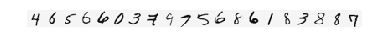

In [7]:
displayData(XX)

In [8]:
def sigmoid(z):
    return(1/(1+np.exp(-z)))

In [9]:
def lrCostFunction(theta, xx, y, reg):   #reg stands for lambda
    n = xx.shape[1]
    theta = np.reshape(theta, (n,1))
    m = y.size
    y = np.c_[y]
    h = sigmoid(xx.dot(theta))
    J = 0
    J =  -(np.log(h).T.dot(y) + np.log(1-h).T.dot(1-y))/m + (reg*np.sum(np.square(theta)))/(2*m)
    if np.isnan(J[0]):
        J[0] = np.inf
    return (J[0])

In [10]:
def lrGradient(theta, xx, y, reg):
    n = xx.shape[1]
    y = np.c_[y]
    m = y.size
    theta = np.reshape(theta, (n,1))
    h = sigmoid(xx.dot(theta))
    grad = np.zeros((n,1))
    grad = (xx.T.dot(h-y) + reg*(theta))/m
    return np.ndarray.flatten(grad)

In [11]:
def oneVsAll(xx, y, num_labels, reg):
    k=10
    m,n  = xx.shape
    y = np.c_[y]
    initial_theta = np.zeros((n,1), dtype=float)
    all_theta = np.zeros((num_labels, n), dtype=float)
    for i in range(num_labels):
        res = op.minimize(lrCostFunction, initial_theta, args=(xx, y, reg), jac=lrGradient, method=None, options={'maxiter':50})
        all_theta[i] = res.x
    return all_theta

In [12]:
theta = oneVsAll(XX, Y, 10, 0.1)

In [13]:
def predictOneVsAll(all_theta, xx):
    m,n = xx.shape
    num_labels = all_theta.size
    p = np.zeros((n,1), dtype=float)
    p = sigmoid(xx.dot(all_theta.T))
    p = (np.argmax(p, axis=1)+1)
    return p

In [14]:
pred = predictOneVsAll(theta, XX)
print('Training set accuracy: {} %'.format(np.mean(pred == Y.ravel())*100))

Training set accuracy: 10.0 %


### Neural networks

In [15]:
weights = io.loadmat("ex3weights.mat")
theta1 = weights["Theta1"]
theta2 = weights["Theta2"]

In [16]:
def predict(theta1, theta2, xx):
    z2 = xx.dot(theta1.T)
    a2 = sigmoid(z2)
    
    a2 = np.c_[np.ones((a2.shape[0],1)),a2]
    
    z3 = a2.dot(theta2.T)
    a3 = sigmoid(z3)
    
    return (np.argmax(a3, axis=1)+1)

In [17]:
pred = predict(theta1, theta2, XX)
pred[pred==10] = 0
print('Training set accuracy: {} %'.format(np.mean(pred == Y.ravel())*100))

Training set accuracy: 97.52 %
